# Introdução ao algorítmo KNN (K-Nearest Neighbors):
## K-Vizinhos mais próximos

In [1]:
from IPython.display import HTML

HTML("""
<video width="578" height="361"
       src="./Introdução.mp4"  
       controls>
</video>
""")

Corrigir a introdução: Objetivo do Objeto, não do Projeto.
* Corrigir no vídeo

## 1.0 Introdução

O modelo K-Nearest Neighbors (KNN) é um algoritmo de aprendizado de máquina utilizado para classificação e regressão. Ele é um dos métodos mais simples e intuitivos para classificar novos pontos de dados com base na proximidade com exemplos existentes.

O funcionamento do KNN é bastante simples. Ele armazena um conjunto de dados de treinamento com rótulos conhecidos e, quando recebe um novo exemplo sem rótulo, procura pelos k vizinhos mais próximos no conjunto de treinamento. A distância entre os pontos é calculada usando uma métrica, como a distância euclidiana, e os k vizinhos mais próximos são selecionados.

No caso da classificação, o rótulo mais comum entre os k vizinhos é atribuído ao novo exemplo. No caso da regressão, a média dos rótulos dos k vizinhos é usada como o valor previsto para o novo exemplo.

O valor de k é um parâmetro importante no KNN. Um valor menor de k torna o modelo mais sensível a ruídos e flutuações nos dados, enquanto um valor maior suaviza as fronteiras de decisão e pode perder detalhes finos.

O KNN tem algumas limitações, como a necessidade de manter todo o conjunto de treinamento na memória para realizar as consultas de vizinhos mais próximos, o que pode ser computacionalmente caro para grandes conjuntos de dados. Além disso, a escolha adequada da métrica de distância e do valor de k também é importante para obter resultados precisos.

Em resumo, o KNN é um algoritmo de aprendizado de máquina simples e eficaz que classifica novos exemplos com base na proximidade com exemplos de treinamento, tornando-o adequado para problemas de classificação e regressão.

### 1.1 Definições

* K-NN é um método de modelo preditivo baseado em distância.
* Considera a proximidade entre os dados (ou pontos) para a realização das predições.
* Tem como hipótese que dados similares tendem a estar concentrados em uma mesma região.
* As variações são definidas pelo número de vizinhos encontrados.
* A métrica mais usual utilizada é a distância euclidiana.


### 1.2 Pontos Positivos

* Algoritmo de treinamento Simples.
* Simplificação de função objetivo para otimização.
* Aplicável em problemas simples e complexos.
* Algoritmo incremental para fins de treinamento.

### 1.3 Pontos Negativos

* Maior esforço computacional na fase de treinamento.
* Para classificar uma nova observação, requer calcular a distância deste objeto em relação a todos os objetos de treinamento.

## 2.0 Base de Dados

Para este experimento, vamos utilizar a base de dados "Iris flower". Esses conjuntos de dados consistem em 3 tipos diferentes de comprimento de pétala e sépala de íris (Setosa, Versicolour e Virginica), armazenados em um numpy.ndarray de 150 x 4

As linhas são as amostras e as colunas são: Comprimento da Sépala, Largura da Sépala, Comprimento da Pétala e Largura da Pétala.

Referências: "Colocar Links como citação"
* https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
* https://en.wikipedia.org/wiki/Iris_flower_data_set


<img src='Iris.png'>

* 50 amostras de 3 espécies diferentes de íris (total de 150 amostras)
* Medidas: comprimento da sépala, largura da sépala, comprimento da pétala, largura da pétala
* O formato dos dados: (comprimento da sépala, largura da sépala, comprimento da pétala, largura da pétala)

Descrição:
* sepal_length: Comprimento da sépala, em centímetros, usado como entrada.
* sepal_width: Largura da sépala, em centímetros, usada como entrada.
* petal_length: Comprimento da pétala, em centímetros, usado como entrada.
* petal_width: Largura da pétala, em centímetros, usada como entrada.
* classe: Iris Setosa, Versicolor ou Virginica, usada como alvo.

### 2.1 Carregando os dados

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_names'] = iris.target_names[df['target']]

### 2.2 Verificando a distribuição de Classes

Nesta etapa, é importante verificar se a base de dados possui distribuição de dados balanceada entre classes, pois a performance dos modelos são dependentes de alguns fatores sobre os dados, tais como:
* Seleção de amostra.
* Composição.
* Pureza.
* Tamanho

Referência:
USTUNER, M.; SANLI, F. B.; ABDIKAN, SAYGIN. BALANCED VS IMBALANCED TRAINING DATA: CLASSIFYING RAPIDEYE DATA WITH SUPPORT VECTOR MACHINES. International Archives of the Photogrammetry, Remote Sensing & Spatial Information Sciences, v. 41, 2016.

In [4]:
df.groupby('target_names').size()

target_names
setosa        50
versicolor    50
virginica     50
dtype: int64

Nota-se que na base de dados Iris, as classes estão bem distribuidas, porém teremos mais detalhes na análise exploratória de dados.

### 2.3 Análise Exploratória dos dados

### Box plot

Um boxplot (ou diagrama de caixa, numa tradução livre) mostra a distribuição quantitativa dos dados de um jeito que facilita a comparação entre as variáveis, ou através dos níveis categóricos das variáveis.

Essa caixa (“box”) mostra os quartis do dataset enquanto os “whiskers” mostram o resto da distribuição, exceto os pontos que são chamados de outliers.

<img src='BoxPlot.png'>

<Figure size 432x288 with 0 Axes>

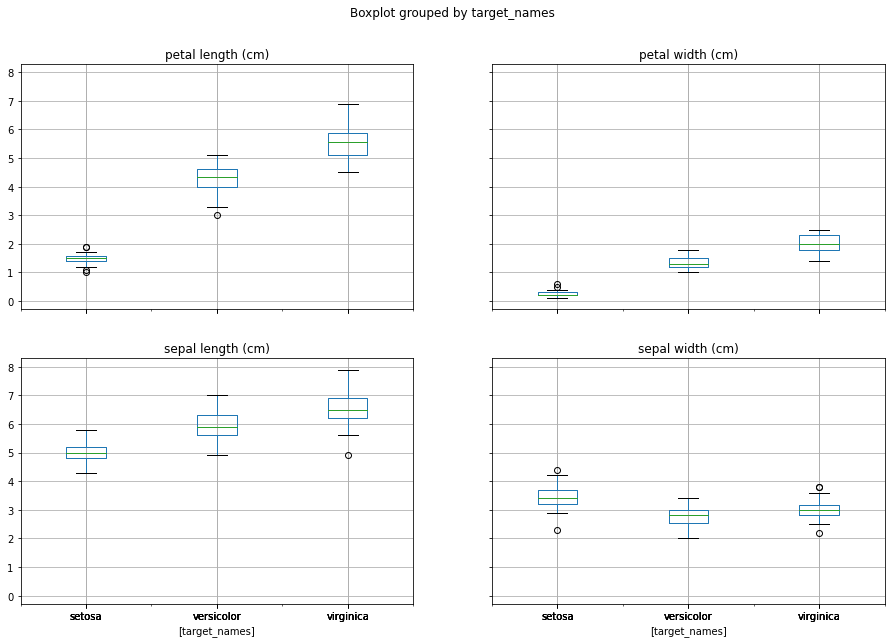

In [5]:
plt.figure()
df.drop("target", axis=1).boxplot(by="target_names", figsize=(15, 10))
plt.show()

### Gráfico de coordenadas paralelas.

Para dados não tão densos, uma forma de observar a relação entre classes é através do gráfico de coordenadas paralelas. 

Esse tipo de visualização é usado para plotar dados numéricos multivariados. Os Gráficos de Coordenadas Paralelas são ideais para comparar muitas variáveis juntas e ver as relações entre elas. Por exemplo, se você tivesse que comparar uma variedade de produtos com os mesmos atributos (comparando especificações de computador ou carro em diferentes modelos).

Para mais detalhes, acessar o recurso: https://datavizcatalogue.com/methods/parallel_coordinates.html

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

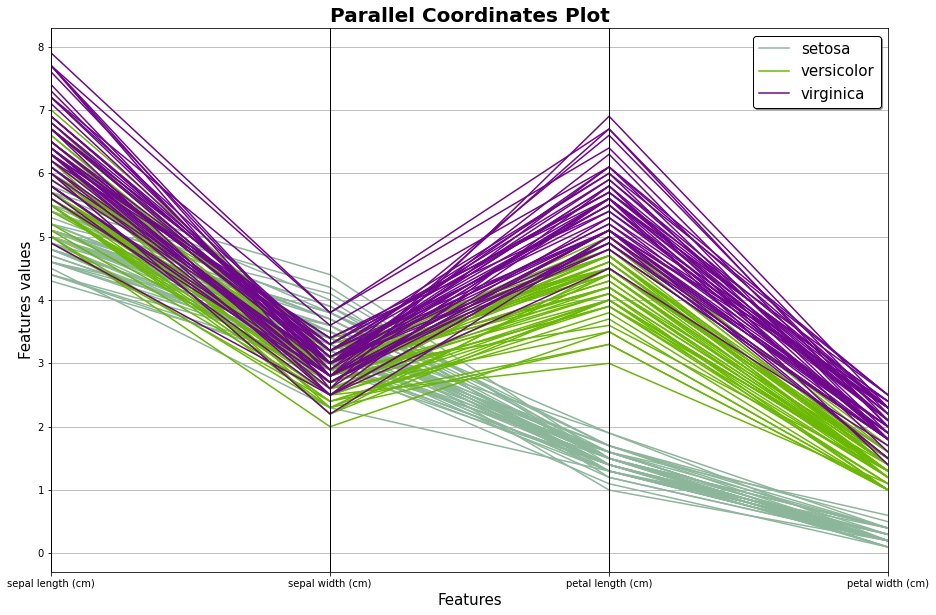

In [7]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(df.drop("target", axis=1), "target_names")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

In [8]:
#
#from pandas.plotting import andrews_curves
#plt.figure(figsize=(15,10))
#andrews_curves(df.drop("target", axis=1), "target_names")
#plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
#plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
#plt.show()

### Pair Plot

Um gráfico "pair plot" é um gráfico com subgráficos onde cada subgráfico representa uma distribuição bivariada de duas variáveis no conjunto de dados fornecido.

Referência técnica: https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [9]:
from IPython.display import HTML

HTML("""
<video width="578" height="361"
       src="./Pair_Plot.mp4"  
       controls>
</video>
""")

C:\Users\s1149592\Anaconda3\envs\ic_mackenzie\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

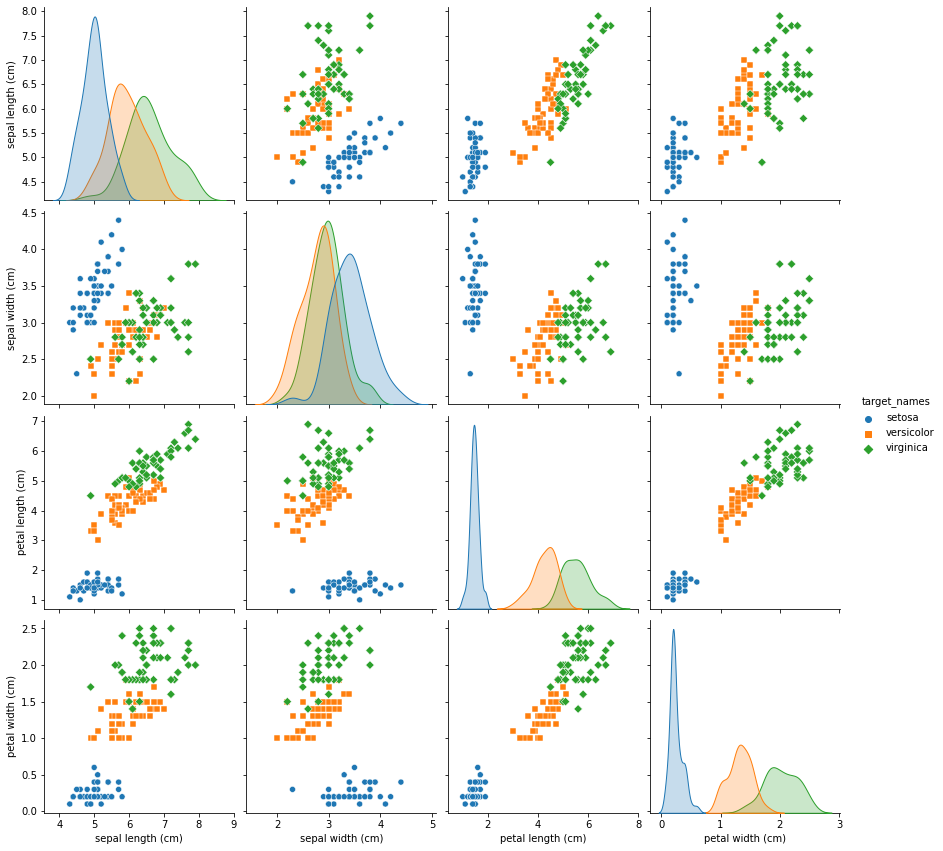

In [10]:
plt.figure()
sns.pairplot(df.drop("target", axis=1), hue = "target_names", size=3, markers=["o", "s", "D"])
plt.show()

## 3.0 Preparando os dados

In [11]:
iris_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

In [12]:
X = df[iris_features]
y = df.target

A função train_test_split do Sklearn nos ajuda a criar nossos dados de treinamento e dados de teste. Isso ocorre porque, normalmente, os dados de treinamento e os dados de teste vêm do mesmo conjunto de dados original. Para obter os dados para construir um modelo, começamos com um único conjunto de dados e depois o dividimos em dois conjuntos de dados: treinar e testar.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## 4.0 Construindo o modelo de KNN

In [6]:
from IPython.display import HTML

HTML("""
<video width="578" height="361"
       src="./KNN - Introdução.mp4"  
       controls>
</video>
""")

In [2]:
##HTML('<iframe width="640" height="360" src="https://www.youtube.com/embed/HVXime0nQeI" title="StatQuest: K-nearest neighbors, Clearly Explained" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>')

Entendendo a matemática básica por detrás do KNN:
    
**Geometria Analítica**

A distância entre pontos no plano cartesiano pode ser obtida pela aplicação do teorema de Pitágoras, com isso, temos a primeira definição:

<img src='formula1.png'>

Logo, uma vez que, para qualquer número real, o quadrado de seu módulo é igual ao seu próprio quadrado, temos:

<img src='formula2.png'>

Para tornar a matemática mais conveniente, podemos generalizar a formulação e descrever a distância euclidiana, ou distância entre 2 pontos, da seguinte maneira:

<img src='formula3.png'>

<img src='Imagem4.png'>

Uma extensão imediata ao algoritmo 1-NN é considerar, em vez de um vizinho mais próximo, os objetos do conjunto de treinamento mais próximos do ponto de teste xt, em que k é um parâmetro do algoritmo. Quando o valor de k é maior que 1, para cada ponto de teste, são obtidos k vizinhos. Cada vizinho vota em uma classe. As previsões dos diferentes vizinhos são agregadas de modo a classificar o ponto de teste.

<img src='Imagem5.png'>

### 4.1 KNN-Playground

Uma forma de entender como o KNN divide as classes é a utilização de Simuladores.

Um um simulador interessante para esutdo do KNN é o Machine Learning Playground, que pode ser acessado através do link: https://ml-playground.com/

### 4.2 Construindo o Modelo

#### Considerando o númeto de K-Vizinhos igual a 3

In [15]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [16]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

<AxesSubplot:>

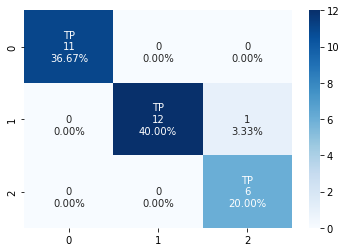

In [17]:
group_names = ['TP','','','','TP','','','', 'TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [18]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


### 4.3 Encontrando o melhor número de K-Vizinhos

In [19]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

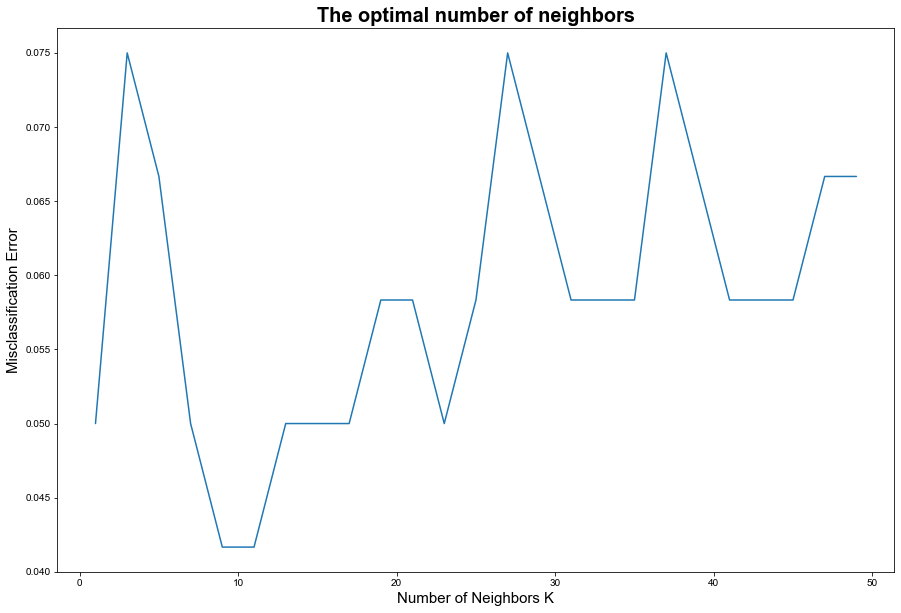

In [20]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [21]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 9.


### 4.4 Construindo um modelo ótimo

In [22]:
classifier = KNeighborsClassifier(n_neighbors=best_k)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [23]:
cm_best = confusion_matrix(y_test, y_pred)
cm_best

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

<AxesSubplot:>

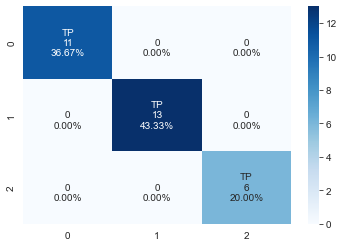

In [24]:
group_names = ['TP','','','','TP','','','', 'TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_best.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_best.flatten()/np.sum(cm_best)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
sns.heatmap(cm_best, annot=labels, fmt='', cmap='Blues')

In [25]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 100.0 %.


## 5 Referências

FACELI, Katti; LORENA, Ana C.; GAMA, João; AL, et. **Inteligência Artificial - Uma Abordagem de Aprendizado de Máquina**. Grupo GEN, 2021. E-book. ISBN 9788521637509. Disponível em: https://app.minhabiblioteca.com.br/#/books/9788521637509/. Acesso em: 05 abr. 2023.

scikit-learn, **The Iris Dataset**. Disponível em https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html.

StatQuest, **K-nearest neighbors, Clearly Explained**. Disponível em: https://www.youtube.com/watch?v=HVXime0nQeI